# Information Theory Project Part 1
Saifelden Mohamed Ismail - 202100432



### requirement 1 
#### Calculating probabilities

In [289]:
import string
import numpy as np
file_object = open("Test_text_file.txt")
file_raw=file_object.read();
symbols=string.ascii_lowercase+"().,/- "
symbols_probabilities=dict(zip(list(symbols),[0]*len(symbols)))
file_length=len(file_raw)

for i in range(file_length):
    symbols_probabilities[file_raw[i]]+=1*(1/file_length)

symbols_probabilities




{'a': 0.07193732193732202,
 'b': 0.012108262108262113,
 'c': 0.026353276353276337,
 'd': 0.0455840455840456,
 'e': 0.10398860398860417,
 'f': 0.013532763532763538,
 'g': 0.01424501424501425,
 'h': 0.022079772079772072,
 'i': 0.0605413105413106,
 'j': 0.0007122507122507123,
 'k': 0.0007122507122507123,
 'l': 0.04202279202279203,
 'm': 0.02136752136752136,
 'n': 0.06410256410256417,
 'o': 0.06267806267806274,
 'p': 0.03703703703703703,
 'q': 0.0007122507122507123,
 'r': 0.05982905982905989,
 's': 0.056267806267806315,
 't': 0.07193732193732202,
 'u': 0.018518518518518517,
 'v': 0.009259259259259262,
 'w': 0.007834757834757837,
 'x': 0.0049857549857549865,
 'y': 0.006410256410256412,
 'z': 0.002136752136752137,
 '(': 0.002136752136752137,
 ')': 0.002136752136752137,
 '.': 0.004273504273504274,
 ',': 0.007834757834757837,
 '/': 0.0007122507122507123,
 '-': 0.0113960113960114,
 ' ': 0.1346153846153847}

### Requirement 2
#### Calculating Entropy

In [290]:
from math import log2
Entropy = sum([ i*-log2(i) if i!=0 else 0 for i in symbols_probabilities.values()])
print(Entropy, "bits/symbol")

4.257010564738072 bits/symbol


### Requirement 3
#### Fixed Length Code Calculation

In [291]:
fixed_length_bits_per_symbol=round(log2(len(symbols)))
fixed_length_efficiency= 6*sum([*symbols_probabilities.values()])
print(fixed_length_efficiency, "bits/symbol")

6.0000000000000036 bits/symbol


### Requirement 4
#### Huffman Encoding function

In [292]:
import bisect


class Node:
    def __init__(self,left=None,right=None):
        self.left=left
        self.right=right
        if self.left!=None and self.right !=None :  
            self.value=self.calculate_value()
    def calculate_value(self):
        left_value=self.left.value if isinstance(self.left, Node) else self.left[1]
        right_value=self.right.value if isinstance(self.right, Node) else self.right[1]
        return left_value +right_value

class encoder:
    def calculate_probabilities(self):
        file_object = open(self.file_name)
        file_raw=file_object.read();
        self.file_raw=file_raw
        self.symbols=list(set(file_raw))
        number_of_symbols=len(self.symbols)
        symbols_probabilities=[0]*number_of_symbols
        file_length=len(file_raw)
        for i in range(file_length):
            symbols_probabilities[self.symbols.index(file_raw[i])]+=(1/file_length)

        symbols_probabilities_set= list(zip(self.symbols,symbols_probabilities)) 
        self.symbols_probabilities=sorted(symbols_probabilities_set, key= lambda x: x[1] ,reverse=True)
    def generate_encoded_message(self):
        self.encoded_message=""
        for i in self.file_raw:
            self.encoded_message+=self.encoding[i]

    def generate_encoding(self,node=None,path="", leaves={}):
        if node is None:
            node= self.encoding_tree
        if not isinstance(node,Node):
            leaves[node[0]]=path
            return leaves
        self.generate_encoding(node.left,path+"0",leaves)
        self.generate_encoding(node.right,path+"1",leaves)
        return leaves



class huffman_encoder(encoder):
    def __init__(self,file_name,file_name_output):
        self.file_name=file_name
        super().calculate_probabilities()
        self.generate_huffman_tree()
        self.encoding=super().generate_encoding()
        super().generate_encoded_message()

        file_output=open(file_name_output,"w")
        file_output.write(self.encoded_message)
        file_output.close()
    def generate_huffman_tree(self):
        tree_list=self.symbols_probabilities
        tree_list= sorted(tree_list, key=lambda x: x.value if isinstance(x, Node) else x[1])
        while(len(tree_list)>1):
            new_value=Node(tree_list.pop(0),tree_list.pop(0))
            bisect.insort(tree_list,new_value, key=lambda x:x.value if isinstance(x,Node) else x[1] )
        self.encoding_tree=tree_list[0]
  


 

In [293]:
from pandas import DataFrame as df
encoded_file=huffman_encoder("Test_text_file.txt","Test_text_file.zip") 
table1=df({"Symbols":encoded_file.encoding.values(),"Encoding":encoded_file.encoding.keys()})
huffman_code=encoded_file.encoding.values()
table1

,Symbols,Encoding
0,0000,d
1,000100,-
2,000101,b
3,00011,c
4,001,e
5,0100,s
6,010100,f
7,0101010,y
8,0101011,w
9,010110,g


### REQUIREMENT 5
#### Huffman Decoding Function

In [294]:
class decoder:
    def __init__(self,encoding_tree,file_input_name,file_output_name):
        self.encoding_tree=encoding_tree
        self.decode(file_input_name)
        self.file=open(file_output_name,"w")
        self.file.write(self.decoded_output)
        self.file.close()
    def decode(self,file_input_name):
        file_object = open(file_input_name)
        file_input_raw=file_object.read();
        self.file_input_raw=file_input_raw    
        
        navigation_node=self.encoding_tree
        self.decoded_output="" 
        for i in file_input_raw:
            if not isinstance(navigation_node,Node):
                self.decoded_output+=navigation_node[0]
                navigation_node=self.encoding_tree

            if i=='0':
                navigation_node=navigation_node.left
            elif i=='1':
                navigation_node=navigation_node.right
                




In [295]:

decoded_file=decoder(encoded_file.encoding_tree,"Test_text_file.zip","Test_text_file_unzipped.txt")
decoded_file.decoded_output


'in this paper, a novel decorrelation-based concurrent digital predistortion (dpd) solution is proposed for dual-band transmitters (tx) employing a single wideband power amplifier (pa), and utilizing just a single feedback receiver path. the proposed decorrelation-based parameter learning solution is both flexible and simple, and operates in a closed-loop manner, opposed to the widely applied indirect learning architecture. the proposed decorrelation-based learning and dpd processing can also be effectively applied to more ordinary single-band transmissions, as well as generalized to more than two transmit bands. through a comprehensive analysis covering both the dpd parameter learning and the main path processing, it is shown that the complexity of the proposed concurrent dpd is substantially lower compared with the other state-of-the-art concurrent dpd methods. extensive set of quantitative simulation and rf measurement results are also presented, using a base-station pa as well as a

### REQUIREMENT 6
#### Calculating efficiency of Huffman Code

In [296]:
encoded_file.encoding
encoded_file.symbols_probabilities

average_length= sum([i[1]*len(encoded_file.encoding[i[0]]) for i in encoded_file.symbols_probabilities])
print(f"the encoding's effieciency is {Entropy/average_length}")

the encoding's effieciency is 0.9954768209347515


### REQUIREMENT 7
#### Creating a Shannon encoder

In [297]:
class shannon_encoder(encoder):
    def __init__(self,file_name,file_name_output):
        self.file_name=file_name
        super().calculate_probabilities()
        self.generate_shannon_tree() 
        self.encoding=super().generate_encoding()
        super().generate_encoded_message()

        with open(file_name_output, "w") as file_output:
            file_output.write(self.encoded_message)
 
    def generate_shannon_tree(self,symbols_probabilities=None, navigation_node=None):

        if symbols_probabilities==None:
            symbols_probabilities=self.symbols_probabilities
        if navigation_node==None:
            self.encoding_tree=Node()
            navigation_node=self.encoding_tree



        total_probability = sum(value for _, value in symbols_probabilities)
        accumulated_probabilities = 0
        midpoint = 0

        for i, (_, probability) in enumerate(symbols_probabilities):
            accumulated_probabilities += probability
            if accumulated_probabilities >= total_probability / 2:
                midpoint = i
                break

        left_split=symbols_probabilities[:midpoint]
        right_split=symbols_probabilities[midpoint:]
        if len(symbols_probabilities)==2:
            navigation_node.left=symbols_probabilities[0]
            navigation_node.right=symbols_probabilities[1]
            return
        if len(left_split)==1:
            navigation_node.left=symbols_probabilities[0]
            navigation_node.right=Node()
            self.generate_shannon_tree(right_split,navigation_node.right)
            return

        navigation_node.left=Node()
        navigation_node.right=Node()
        self.generate_shannon_tree(left_split,navigation_node.left)
        self.generate_shannon_tree(right_split,navigation_node.right)
            
        

In [298]:

from pandas import DataFrame as df
encoded_shannon=shannon_encoder("Test_text_file.txt","Test_text_file_Shannon.zip")
symbols_probabilities=encoded_shannon.symbols_probabilities

table=df({"Symbols":encoded_shannon.encoding.values(),"Encoding":encoded_shannon.encoding.keys()})
table

,Symbols,Encoding
0,1100,d
1,1111011,-
2,1111010,b
3,110111,c
4,010,e
5,10111,s
6,111100,f
7,11111101,y
8,1111101,w
9,1110111,g


### Requirement 8
#### Using the Decoder (same for both shannon and huffman) and Comparing the efficiency
The efficiency for both is identical, to verify if there is an error, I used the encoding tree from the previous huffman encoding for comparison to show that both encodings are in fact seperate

In [299]:
decoded_file=decoder(encoded_shannon.encoding_tree,"Test_text_file_Shannon.zip","Test_text_file_unzipped_Shannon.txt")
decoded_file_wrong=decoder(encoded_file.encoding_tree,"Test_text_file_Shannon.zip","Test_text_file_unzipped_Shannon.txt")
print("Decoded file using shannon encoding tree")
print(decoded_file.decoded_output)
print("Decoded file using the previous huffman tree")
print(decoded_file_wrong.decoded_output)

Decoded file using shannon encoding tree
in this paper, a novel decorrelation-based concurrent digital predistortion (dpd) solution is proposed for dual-band transmitters (tx) employing a single wideband power amplifier (pa), and utilizing just a single feedback receiver path. the proposed decorrelation-based parameter learning solution is both flexible and simple, and operates in a closed-loop manner, opposed to the widely applied indirect learning architecture. the proposed decorrelation-based learning and dpd processing can also be effectively applied to more ordinary single-band transmissions, as well as generalized to more than two transmit bands. through a comprehensive analysis covering both the dpd parameter learning and the main path processing, it is shown that the complexity of the proposed concurrent dpd is substantially lower compared with the other state-of-the-art concurrent dpd methods. extensive set of quantitative simulation and rf measurement results are also present

In [300]:
average_length= sum([i[1]*len(encoded_shannon.encoding[i[0]]) for i in encoded_shannon.symbols_probabilities])
print(f"the encoding's effieciency is {Entropy/average_length}")

the encoding's effieciency is 0.9530924625884625


# INFORMATION THEORY PROJECT PART 2


### Requirement 1, 2 (encoder,channel and decoder)

In [301]:
def file_check(file_name):

    file_check=file_name[0] not in ["0","1",1,0]

    if file_check:
        file_object = open(file_name)
        transmited_message=file_object.read();        
        transmited_message=np.array(list(transmited_message),dtype=int)
        file_object.close()
        return transmited_message
    else:
        return file_name
 
def file_write_array_bits(file_name,message):
    if (file_name):
        file_object = open(file_name,'w')
        file_object.write(arr2str(message))
        file_object.close()   

class error_encoder_decoder:
    def __init__(self,message,output_file=None):

        self.G_matrix= np.array([
            [1,1,0,1],
            [1,0,1,1],
            [1,0,0,0],
            [0,1,1,1],
            [0,1,0,0],
            [0,0,1,0],
            [0,0,0,1],
        ])

        self.H_matrix= np.array([
            [1,0,1,0,1,0,1],
            [0,1,1,0,0,1,1],
            [0,0,0,1,1,1,1],
        ])

        self.R_matrix= np.array([
            [0,0,1,0,0,0,0],
            [0,0,0,0,1,0,0],
            [0,0,0,0,0,1,0],
            [0,0,0,0,0,0,1],
        ])

        self.lookup_table= {
            (0, 0, 0): -1,
            (0, 0, 1):  3 ,
            (0, 1, 0):  1 ,
            (0, 1, 1):  5 ,
            (1, 0, 0):  0 ,
            (1, 0, 1):  4 ,
            (1, 1, 0):  2 ,
            (1, 1, 1):  6 
        }


        message=file_check(message)

        message_binary=np.array(list(message),dtype=int)
        self.message_length=len(message_binary)
        self.buffer_length=4-len(message_binary)%4 
        
        buffer=np.zeros(self.buffer_length)


        message_binary=np.concatenate((message_binary,buffer))
        self.add_parity(message_binary)

        file_write_array_bits(output_file,self.encoded_message_array)
        


    
    def add_parity(self,message_binary):

        encoded_message_array=np.zeros(int(len(message_binary)*(7/4)))
        for j,i in zip(range(7,len(encoded_message_array)+7,7),range(4,len(message_binary)+4,4)):
            encoded_message_array[j-7:j]=np.dot(self.G_matrix,message_binary[i-4:i])%2

        self.encoded_message_array=encoded_message_array
    
    def correct_errors(self,encoded_message_array,output_name=None):
        
        encoded_message_array=file_check(encoded_message_array)

        total_message_length=self.message_length+self.buffer_length

        decoded_message_array=np.zeros(total_message_length)

        for j,i in zip(range(7,len(encoded_message_array)+7,7),range(4,total_message_length+4,4)):

            word=encoded_message_array[j-7:j]
            syndrome=np.dot(self.H_matrix,word)%2
            error_bit=self.lookup_table[tuple(syndrome.astype(int))] 
            if(error_bit!=-1):
                word[error_bit]^=1

            decoded_message_array[i-4:i]=np.dot(self.R_matrix,word)%2
            
        self.decoded_message_array=decoded_message_array
        self.decoded_message=''.join(map(str, self.decoded_message_array[:self.message_length].astype(int)))

        file_write_array_bits(output_name,self.decoded_message_array)
       


def arr2str(arr):
    return ''.join(map(str, arr.astype(int)))


def channel(message, SNR_dB ):
    
    file_check=(message[0]) not in [0,1] 
    if file_check:
        file_object = open(message)
        transmited_message=file_object.read();        
        transmited_message=np.array(list(transmited_message),dtype=int)
        file_object.close()
    else: 
        transmited_message=message


    bit_flip_probability = 1 / (10 ** (SNR_dB / 10))
    random_values = np.random.rand(len(transmited_message))
    indices = np.where((random_values < bit_flip_probability) == True)[0]
    noisy_message=np.bitwise_xor(transmited_message.astype(int) ,(random_values < bit_flip_probability))
    

    if file_check:
        file_object = open(message,'w')
        file_object.write(arr2str(noisy_message))
        file_object.close()

    return noisy_message


### Requirement 4 (SNR and BER plot)

testing one pass through channel

In [302]:
def calculate_ber(string1, string2):
    if len(string1) != len(string2):
        raise ValueError("Strings must have the same length.")
    return np.sum(np.array(list(string1), dtype=int) != np.array(list(string2), dtype=int)) / len(string1)


In [303]:
error_encoded_message=error_encoder_decoder(encoded_shannon.encoded_message)
error_encoded_message.encoded_message_array

array([1., 0., 1., ..., 0., 0., 0.], shape=(10976,))

In [304]:
sent_message_parity=channel(error_encoded_message.encoded_message_array, 20)
received_message_no_parity=channel( np.array(list(encoded_shannon.encoded_message),dtype=int),20)

error_encoded_message.correct_errors(sent_message_parity)
received_message_parity=error_encoded_message.decoded_message

In [305]:
arr2str(received_message_no_parity)

'101001111000111011100101010111001101100110110110010101101111110000011000011111001111100110110100011000101101111001011010110010110100110011101010100011111111011111101001101011101011000011011110001111110111111011010110101100100111001110001100101011101111010011110110110100011011010110010110010101011101110100101100111010101000111100111111111011001101101100111111110100101111001101011101100111010101000111100101010111001101101011010011011010010111010110000111100100101100011001110110011011010111101111110100110011101100000111010110011001111101111110101010011100111001010110101110011111111100111011111110111111110100010111010110110110101001111110100100111111101110001100010111101001111111011111010010001111101101011000111111010011001111110000110110100111110101010010000110111010110110110101010111100101001010110001111111110110110011011111111011111110000011001111110000111011001110101011010101011111111110101001111111011100111111111111111110110101100111000111001101111010011111110111110100100011110001001

In [306]:
print(calculate_ber(received_message_no_parity,encoded_shannon.encoded_message))
print(calculate_ber(encoded_shannon.encoded_message,encoded_shannon.encoded_message))
print(calculate_ber(received_message_parity,encoded_shannon.encoded_message))

0.008132674214638813
0.0
0.00143517780258332


#### creating plot
to create our plot accurately, we should run a set number of trials and average them

In [307]:
def create_data(number_of_trials, lower_snr_range,upper_snr_range):
    results_parity=np.zeros((number_of_trials,upper_snr_range-lower_snr_range))
    results_no_parity=np.zeros((number_of_trials,upper_snr_range-lower_snr_range))
    
    for i in (range(lower_snr_range,upper_snr_range)):
        for j in range(0,number_of_trials):
            error_encoded_message=error_encoder_decoder(encoded_shannon.encoded_message)
            sent_message_parity=channel(error_encoded_message.encoded_message_array, i+1)
            received_message_no_parity=channel( np.array(list(encoded_shannon.encoded_message)
                                                         ,dtype=int),i+1)
            error_encoded_message.correct_errors(sent_message_parity)
            received_message_parity=error_encoded_message.decoded_message
    
            results_no_parity[j,i-lower_snr_range]=calculate_ber(
                received_message_no_parity,encoded_shannon.encoded_message)
            
            results_parity[j,i-lower_snr_range]=calculate_ber(
                received_message_parity,encoded_shannon.encoded_message)
            
    return results_no_parity,results_parity 

    
    

In [308]:

results_no_parity,results_parity =create_data(10,0,25)

In [309]:
results_parity_averaged= np.log10(np.mean(results_parity, axis=0))
results_no_parity_averaged= np.log10(np.mean(results_no_parity, axis=0))

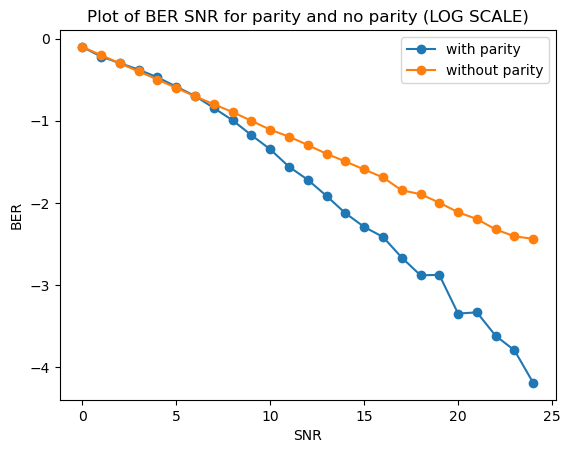

In [310]:
import matplotlib.pyplot as plt

plt.plot(results_parity_averaged, marker='o',label="with parity") 
plt.plot(results_no_parity_averaged, marker='o',label="without parity") 
plt.xlabel('SNR') 
plt.ylabel('BER')
plt.title('Plot of BER SNR for parity and no parity (LOG SCALE)')
plt.legend()
plt.show()


### REQUIREMENT 5 INTEGRATION

for this I will use huffman code

#### 20 SNR

In [311]:
encoded_file=huffman_encoder("Test_text_file.txt","Test_text_file_20SNR.zip") 
error_encoded_file=error_encoder_decoder("Test_text_file_20SNR.zip","Test_text_file_20SNR_error_encoded.zip")

channel("Test_text_file_20SNR.zip",20)

channel("Test_text_file_20SNR_error_encoded.zip",20)

error_encoded_file.correct_errors("Test_text_file_20SNR_error_encoded.zip","Test_text_file_20SNR_error_decoded.zip")

decoded_file=decoder(encoded_file.encoding_tree,"Test_text_file_20SNR.zip","Test_text_file_20SNR.txt")
print(decoded_file.decoded_output)

decoded_file=decoder(encoded_file.encoding_tree,"Test_text_file_20SNR_error_decoded.zip","Test_text_file_20SNR_error_encoding.txt")
decoded_file.decoded_output




in this papei, a novctsdopieolrr paooei-ed concurrent digital reooete ortion (dpd) rolution is pueaosed for dual-band transmitters (tz l employing a single widebano power amplifidttiheo l, and utilizing  ih ee  a single feedbacrmtreceirag path. the proposed decorrelation-based parameteumearning solution ia both flexible and simple, and operates in a closed-loop maoneritreaposedeto the widely applied indirect learning architectmre. the pro edosesdopenomation-based learning a-esead processing can also be effectively applied toemore orditary single-wned transmissions, as w ll as generalized to more thann won ransmrt bands. through a comlrehensive analysis covering both the spd parameter icoteing and the t olrlrrhtprocessing, it is shown that theoeaitalexit, of the proposed concurrent dpd is substantially lower cdmpared with ttatother state-of-the-arteconcurrentocobmenhodsctslvnnsive set ofnt ttrsumptive simrntn ion ancgf measurement resulngpre also presetted, using a base-station pa as we

'in this paper, a novel decorrelation-based concurrent digital predistortion (dpd) solution is proposed for dual-band transmitters (tx) employing a single wideband power amplifieir haa), and utilizing just a single feedback receiver path. the proposed decorrelation-based parameter learning solution is both flexible and simple, and operates in a closed-loop manner, opposed to the widely applied indirect learning architecture. the proposed decorrelation-based learning and dpd processing can also be effectively applied to more ordinary single-band transmissions, as well as generalized to more than two transmit bands. through a comprehensive analysis covering both the dpd parameter learning and the main path processing, it is shown that the complexity of the proposed concurrent dpd is substantially lower compared with the other state-of-the-art concurrent dpd methods. extensive set of quantitative simulation and rf measurement results are also presented, using a base-station pa as well as 

#### 10 SNR


In [312]:
encoded_file=huffman_encoder("Test_text_file.txt","Test_text_file_10SNR.zip") 
error_encoded_file=error_encoder_decoder("Test_text_file_10SNR.zip","Test_text_file_10SNR_error_encoded.zip")

channel("Test_text_file_10SNR.zip",10)

channel("Test_text_file_10SNR_error_encoded.zip",10)

error_encoded_file.correct_errors("Test_text_file_10SNR_error_encoded.zip","Test_text_file_10SNR_error_decoded.zip")

decoded_file=decoder(encoded_file.encoding_tree,"Test_text_file_10SNR.zip","Test_text_file_10SNR.txt")
print(decoded_file.decoded_output)

decoded_file=decoder(encoded_file.encoding_tree,"Test_text_file_10SNR_error_decoded.zip","Test_text_file_10SNR_error_encoding.txt")
decoded_file.decoded_output




in cmuszler, a novel denaenomatinbsbas d iasomnnorvoearexi ,renistov aeeo mcodel s wir paty)ueaored foroc iiosdrrsozonsmhise nwitz twmlpoyeau,yit v r g nebaocind rfesmpll ,g chaon ee ilo.  ilixe eg ahlne  u bngad tdodbtck reggveewecil jhe prohdnsesddpenamt   -doeiddo.pereplnr lcbnrng sotig ps  tefre ha epi tpiicrrdefii ale, and orb sose)ta ehd-soslaavhpnneritpieaofo,orhlr gud bwnspmpowaoefeca  oprnea r aichitrekrul lmrle cncoo-dop ccvr oeredcoaseiaicd ph,gbefd pegenrsinf bdbalso berlo snl maiau apai rseiirhseotorarnap yolirt-swnechers elissionsc ior ,li eontr-drammio dsast daelhpo two tranatnltbatdr.etit c erm t c ihcchl ctremsplssouflciesetqere h the dpcinotn oa   iai-tinf a d,hnumeptxsht csda -inine )airuembie nipr,h toaitzitsu yadoigvle ctdof concursiemdidecp arofe s ui lieyn d rg coinneri-srmpxhn oter,t  atecserbwponnte cancat aw  due me(udo psitintsh nts tnd  i uuooti.ti rifiuulaahee anopnsnpeasur m-r nbeninf aftalgeinawrisaeylnca xns, danneh.eeepuunyaml as a nortlrae   l lfo advt

'nn ampninnav,dnrretom decoeeomationeoeiefd dosomnnooatdigitluleooete osnion (elderl ecttd xr m proposed for dual-baadr rans am s newhi a leemployi  o a sins pr t adogso.iese opmpliftrv tlr sa tie d utilizmse.hlne  a bp rle feed-semmtreceiver path. the prolarrbdecorrelae psooeiepn-n rameteciaics p r soli   astis both flexible anctchicdor and operat s ino pe a-ed-lood(pnnersnr aposed td the wsoely applied indirect micsna r srih lnctug reiilrle cniodor-raaaitn ion-einsf learwav and dpd processing cantoasnebe effectively npplgo,aguccgrdindrytolwiodoeieeddo anrmissioneei.d well as generalraled to more than two transmitlsdnds.craueterh a bcoreohnnsive analy)nsibdereostsgehlahnrdletndrameter icoterytieed the ppin paaizeadrfsrya tgn is shos n nmrt thedenhsnaino  y oneiilwdtcnd dbconcurrietodad is substantpnzwnubrg doi,reooynr(ttlgarhor soalwses-thd eoi  co dmnnoovoiaeipe h debunxua cire seteof qpssumptive simulatesstanenrf meaturcrent resultd arlplso ppfented, using aoop-oon atr stptioe e oe 

#### 15 SNR

In [313]:
encoded_file=huffman_encoder("Test_text_file.txt","Test_text_file_15SNR.zip") 
error_encoded_file=error_encoder_decoder("Test_text_file_15SNR.zip","Test_text_file_15SNR_error_encoded.zip")

channel("Test_text_file_15SNR.zip",15)

channel("Test_text_file_15SNR_error_encoded.zip",15)

error_encoded_file.correct_errors("Test_text_file_15SNR_error_encoded.zip","Test_text_file_15SNR_error_decoded.zip")

decoded_file=decoder(encoded_file.encoding_tree,"Test_text_file_15SNR.zip","Test_text_file_15SNR.txt")
print(decoded_file.decoded_output)

decoded_file=decoder(encoded_file.encoding_tree,"Test_text_file_15SNR_error_decoded.zip","Test_text_file_15SNR_error_encoding.txt")
decoded_file.decoded_output


in texneaaper, aenovel dreaenomationdo,edogi-omnnoavoetriaohrotsc ircr pst(opd) solutetstir proasedoyndtsearg-bandm  nesmi,nss (txil employuwcnfitgliytado and power ampliscnr shaa), and uwmizing just a sini pey-od ack receiver paah. t pnproposed dec enomation-based parameteumearnea r soiig pste esccim smgpp)e and sehieuoupnd operates in t closed-loop manner,e ieaosed to the widely alpliedolsc ooltlearning architecture. glrle cndosesdopenomawasooei-ed learning a ofeaciotoiessing can also cn effreuhrely aaiiapo,aihdre ordinary single-bans transtnt-ions, as well as generalrzed tdnlore tilsntwo tvs elit ba-eo uumfis  hlflelprehensive analysis ,etonep r both the dpd parameter learoin.pndmhn main path processing, hr tefhow tthat the complexitylbeiilrtcsreaodesi-o ten pvoldw efmbstantianinymower co/sred with t ptotta  f,rn-of-tiaonote concpenoavoiddhc hodsctdlvnosive set of quantitatiaar chiwrr p,pnd rf lconteohcet results ore also presentrci.nca r a base-stv pstpa ts tpm  i- a dputo ortnumte

'in this pasbni,gretom decorrelation-based concurrent digital predistortion (dpd) solution is proposed for dual-band transmitters gmlp l employing a single widebapbpower amplifier (pa), and utilizing just a single feedback receiver path. the  n cndosesdopenomation-beedo.re nleter learning solution is -oth flexible and simple, and operates in a closed-loop ma anr, opposed to thy r dely applied indirect learning architectvswtiilrle cndosesdop-aitneion-based hics p r and dpd processing can also be effectively applied to more ordinary single-band transmisdions, as well as generamhnoo,a(seotthan two transmit bands. through tecomprehensive analysis coveigwfge h theo,d.re nleter learning and the main path processing, it is shown that the complexity of the proposed concurrent dpd is substantially lower compared with the other state-of-the-art concurrent dpd methods. extensive set of quantitative simulation and rf measurement ebeti  s are also presented, using a base-station pa as well as a com